In [1]:
path = 'housing.csv'



In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
from IPython.display import display
from datetime import datetime, timezone
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(path)

PermissionError: [Errno 13] Permission denied: 'housing.csv'

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df[df.total_bedrooms.isna()]

In [28]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df.hist(figsize = (15, 10), bins = 50);

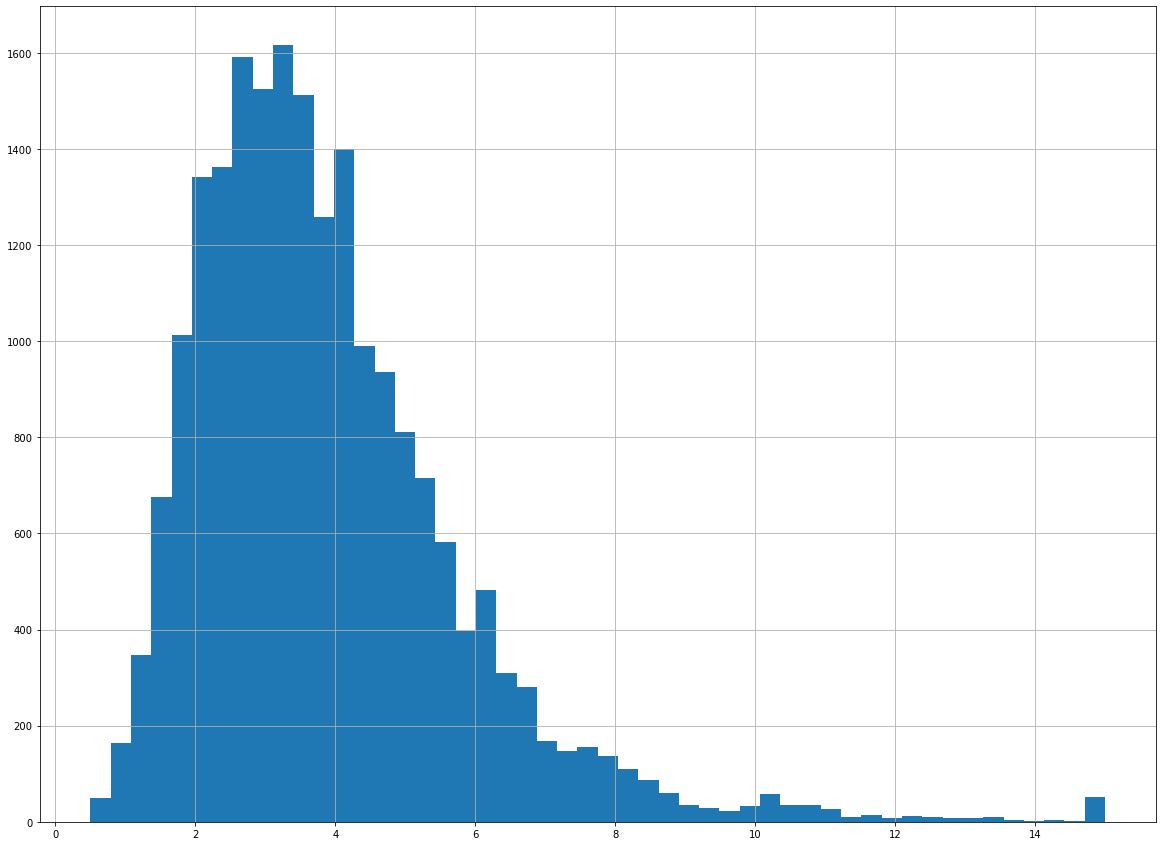

In [10]:
df.median_income.hist(figsize = (20, 15), bins = 50);

In [35]:
df['cat_income'] = pd.cut(df.median_income, bins = [0, 1.5, 3, 4.5, 6., np.inf], labels = [1, 2, 3,4,5])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  cat_income          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
tmp = (df.cat_income.value_counts()/ len(df)).to_frame()
tmp


,cat_income
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


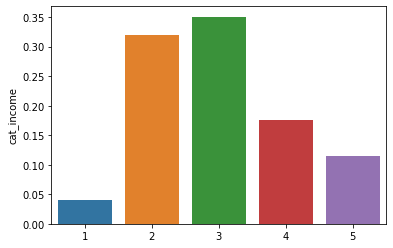

In [23]:
sns.barplot( y = tmp.cat_income, x = tmp.index);

<AxesSubplot:>

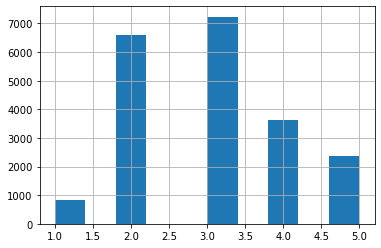

In [37]:
df = pd.concat([df,pd.get_dummies(df.ocean_proximity)], axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,0,1,0,0,0


In [39]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

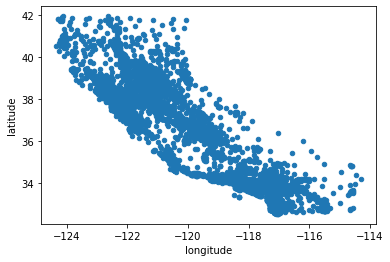

In [43]:
df.plot(x = 'longitude', y = 'latitude', kind = 'scatter')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

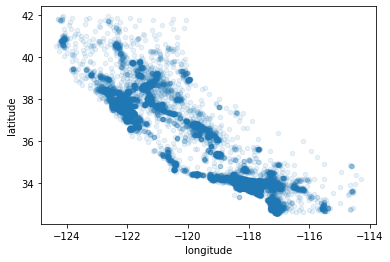

In [45]:
df.plot(x = 'longitude', y = 'latitude', kind = 'scatter', alpha = 0.1, );

In [6]:
plt = df.plot(x = 'longitude', y = 'latitude', kind = 'scatter', alpha = 0.5, 
        s = df.population/100, figsize = (10, 7),
        c = 'median_house_value');


NameError: name 'df' is not defined

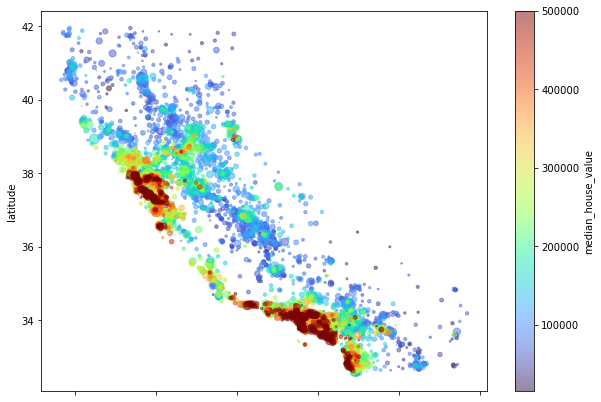

In [59]:
tpm = df.sort_values(by = 'median_house_value')
tpm.plot(x = 'longitude', y = 'latitude', kind = 'scatter', alpha = 0.5, 
         s = df.population/100, figsize = (10, 7),
         c = 'median_house_value', cmap = plt.get_cmap('turbo'));

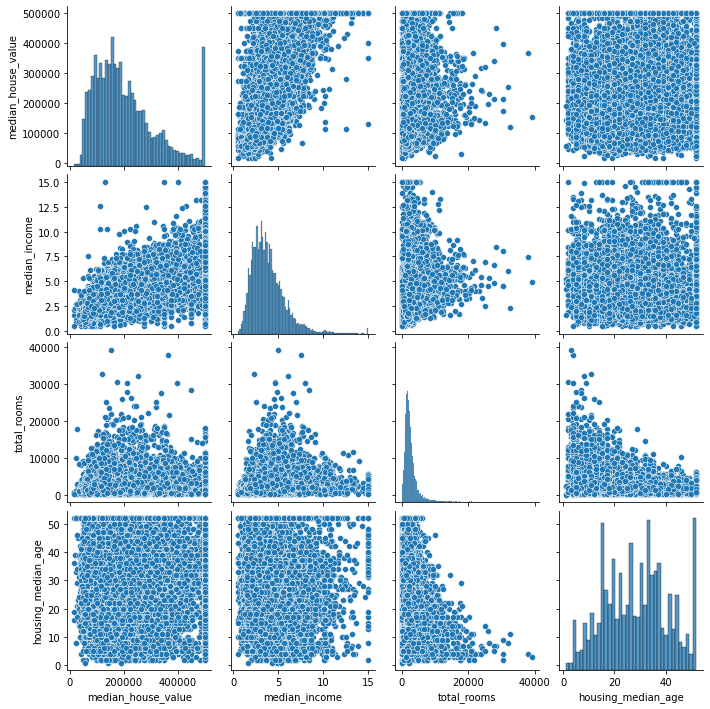

In [61]:
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(df[features]);

In [62]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'cat_income', '<1H OCEAN',
       'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [66]:
cor_mx = df[['housing_median_age', 'total_rooms', 'total_bedrooms',
             'population', 'households', 'median_income','median_house_value']].corr()

<AxesSubplot:>

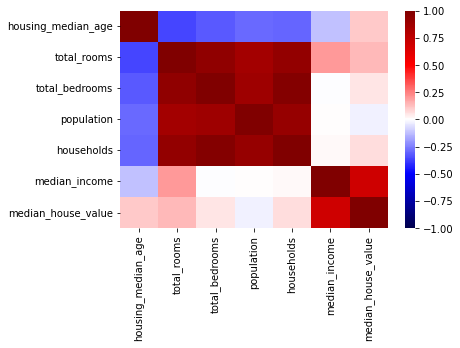

In [69]:
sns.heatmap(cor_mx, vmin= -1, vmax = 1, cmap = plt.get_cmap('seismic'))